# Filter banks and MFCCs with librosa

Date: Sep 21, 2018

Note: librosa does not support LPC: https://github.com/librosa/librosa/issues/725

reference: 
- https://librosa.github.io/librosa/
- http://nbviewer.jupyter.org/github/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
%run ../../lib/dsp.py

import IPython.display
import librosa
import librosa.display

In [2]:
FILE = 'aiueo.wav'
y, sr = librosa.load(FILE, sr=44100)

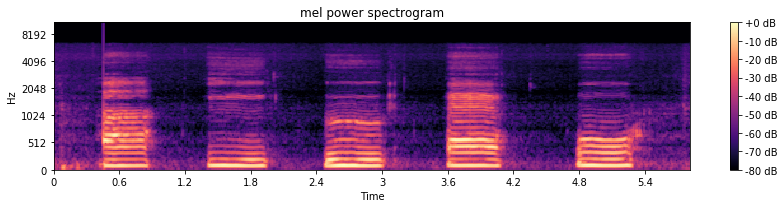

In [3]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12,3))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

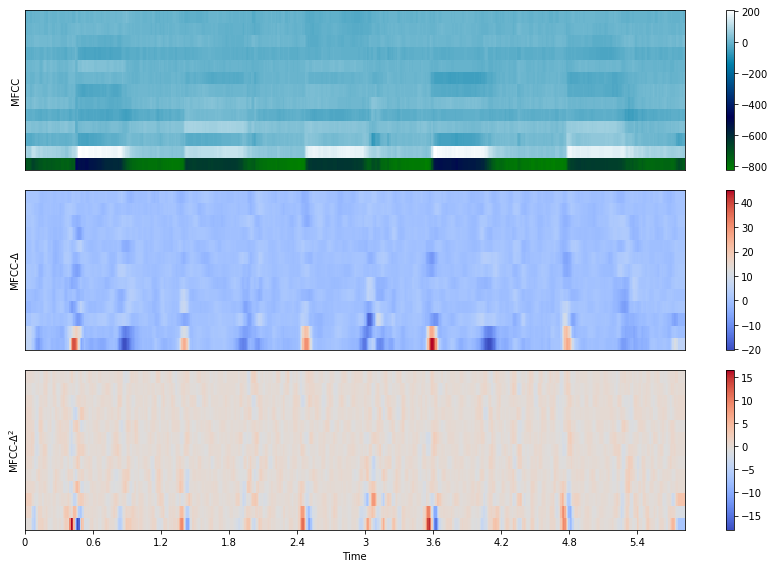

In [4]:
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, cmap='ocean')
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

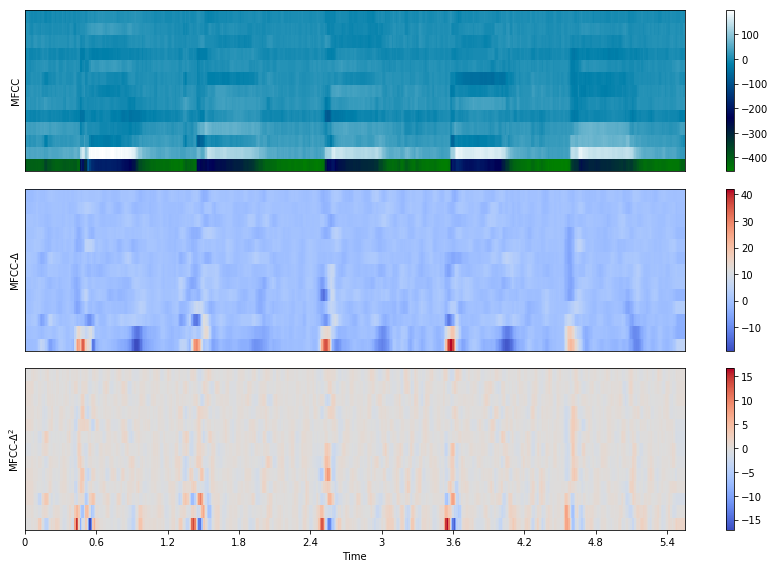

In [5]:
FILE = 'kakikukeko.wav'
y, sr = librosa.load(FILE, sr=44100)
mfcc = librosa.feature.mfcc(y=y,sr=sr, n_mfcc=13)
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, cmap='ocean')
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()